# CatLab Demo Notebook
This notebook loads the CatLab model from github and predicts the vector distance between a single image pair as well as the feature vector of an image. The code is intended for demonstration purposes - use batch predictions when working with multiple images.

In [ ]:
!python --version

Python 3.10.12


In [ ]:
import os
import requests
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt

print("Using the following package versions:")
for package in [tf, np]:
    print(f"{package.__name__:<20}{package.__version__}")

Using the following package versions:
tensorflow          2.15.0
numpy               1.25.2


# Load model

In [ ]:
# The AI model and two example images are loaded from the github repository.
# If no folder exists at the following path, the repository  there.
path_to_catlab_github_repository = "/content/catlab"

if not os.path.isdir(path_to_catlab_github_repository):
    print("Repository was not found at the given path. Cloning...")
    !git clone https://github.com/Leonard-P/Catlab.git $path_to_catlab_github_repository

catlab_model = tf.keras.models.load_model(
    os.path.join(path_to_catlab_github_repository, "catlab_model_2024"),
    compile=False)

Model was not found at the given path. Downloading from github...
Cloning into '/content/catlab'...
remote: Enumerating objects: 386, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 386 (delta 90), reused 170 (delta 87), pack-reused 210
Receiving objects: 100% (386/386), 51.15 MiB | 32.75 MiB/s, done.
Resolving deltas: 100% (173/173), done.


In [ ]:
# Load two example images to compute the vector distance. The default
# paths point to example images from the github repository
# If no images exist at the following paths, two default demo images are
# downlaoded from pixabay.
image_paths = ("test0.jpg",
               "test1.jpg")

for path, url in zip(image_paths, fallback_urls):
    if os.path.exists(path): continue

    with open(path, "wb") as f:
        f.write(requests.get(url).content)

In [ ]:
def preprocess_image(image_path, display_image=False):
    """Prepare the image at the given image_path as model input. Preprocessing
    uses the imagenet dataset normalization values."""
    img = image.load_img(image_path, target_size=(224, 224), keep_aspect_ratio=True, interpolation="bicubic")
    img_array = image.img_to_array(img)

    if display_image:
        plt.imshow(img_array / 255.)
        plt.show()

    # Since we only predict a single image pair at a time for this demo, we
    # have to expand the array's dimension. If you have a batch of images, you
    # can feed the whole batch to the model for greater efficiency.
    img_array = np.expand_dims(img_array, axis=0)

    img_array = preprocess_input(img_array, mode="torch")
    return img_array

# Predict vector distance between two images

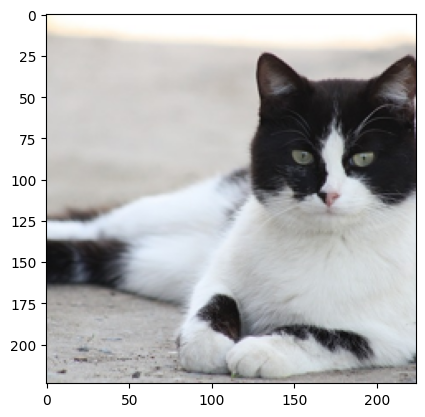

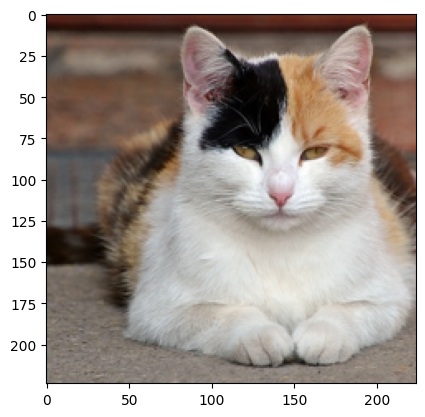

1/1 [==============================] - 3s 3s/step
vector_distance = 0.8789229989051819
same cat detected: False


In [ ]:
image_0 = preprocess_image(image_paths[0], display_image = True)
image_1 = preprocess_image(image_paths[1], display_image = True)

vector_distance = catlab_model.predict([image_0, image_1]).item()

print(f"{vector_distance = }")
print(f"same cat detected: {vector_distance < 0.412}")

# Predict feature vectors

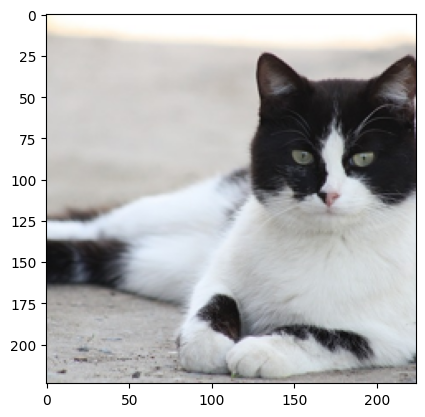

1/1 [==============================] - 4s 4s/step
feature_vector = array([[9.99917567e-01, 7.78264875e-05, 9.24897249e-05, 9.99925196e-01,
        9.99919474e-01, 6.36983532e-05, 7.96366221e-05, 8.54319951e-05,
        9.99941587e-01, 9.99921441e-01, 9.39988677e-05, 9.99918640e-01,
        9.69671786e-01, 9.99916255e-01, 6.73244431e-05, 1.25392500e-04,
        9.99923408e-01, 9.13262367e-01, 9.99916553e-01, 8.12461512e-05,
        9.21242536e-05, 9.24373984e-01, 7.44958888e-05, 9.99930084e-01,
        9.96628150e-05, 7.15903006e-05, 8.80580556e-05, 9.99934077e-01,
        7.61458869e-05, 9.52710034e-05, 9.99910951e-01, 1.08146669e-04,
        8.37376429e-05, 9.99918759e-01, 7.84830918e-05, 9.99910593e-01,
        8.00847192e-05, 9.99903381e-01, 7.81983836e-05, 8.28228585e-05,
        7.37155278e-05, 9.99923766e-01, 8.63805399e-05, 9.38746234e-05,
        9.99893546e-01, 9.52571936e-05, 9.99912620e-01, 9.99916911e-01,
        9.11064926e-05, 9.99943256e-01, 9.99913573e-01, 9.99917746e-0

In [ ]:
# Get one of the model's "twins" that predicts a feature vector
vector_model = catlab_model.layers[2]

img = preprocess_image(image_paths[0], display_image = True)

feature_vector = vector_model.predict(img)
print(f"{feature_vector = }")